# PART- 3 ( Handling With Outliers )

In [24]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore") 
warnings.warn("this will not show")

%matplotlib inline

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid") 
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.options.display.max_rows = 150 
pd.options.display.max_columns = 100
import json
import regex as re
from datetime import date
from datetime import datetime
from datetime import timedelta

In [25]:
df = pd.read_csv("clean_scout_emrePART2.csv")
df.head(10).T

0  \
make_model                                                       Audi A1   
body_type                                                         Sedans   
price                                                              15770   
vat                                                       VAT deductible   
km                                                             56013.000   
Type                                                                Used   
Body Color                                                         Black   
Paint Type                                                      Metallic   
Gearing Type                                                   Automatic   
Cylinders                                                          3.000   
Fuel                                                              Diesel   
Comfort & Convenience  Air conditioning,Armrest,Automatic climate con...   
Entertainment & Media  Bluetooth,Hands-free equipment,On-board comput...   
Extras                    Alloy wheels,Catalytic Converter,Voice Control   
Safety & Security      ABS,Central door lock,Daytime running lights,D...   
Gears                                                              7.000   
Previous_Owners                                                    2.000   
hp_kW                                                             66.000   
Paint_Type                                                      Metallic   
Upholstery_type                                                    Cloth   
Upholstery_color                                                   Black   
Nr_of_Doors                                                        5.000   
Nr_of_Seats                                                        5.000   
Gearing_Type                                                   Automatic   
Displacement_cc                                                 1422.000   
Weight_kg                                                       1220.000   
Drive_chain                                                        front   
cons_comb                                                          3.800   
cons_city                                                          4.300   
cons_country                                                       3.500   
CO2_Emission                                                      99.000   
Emission_Class                                                    Euro 6   

                                                                       1  \
make_model                                                       Audi A1   
body_type                                                         Sedans   
price                                                              14500   
vat                                                     Price negotiable   
km                                                             80000.000   
Type                                                                Used   
Body Color                                                           Red   
Paint Type                                                      Metallic   
Gearing Type                                                   Automatic   
Cylinders                                                          4.000   
Fuel                                                             Benzine   
Comfort & Convenience  Air conditioning,Automatic climate control,Hil...   
Entertainment & Media  Bluetooth,Hands-free equipment,On-board comput...   
Extras                 Alloy wheels,Sport seats,Sport suspension,Voic...   
Safety & Security      ABS,Central door lock,Central door lock with r...   
Gears                                                              7.000   
Previous_Owners                                                    2.000   
hp_kW                                                            141.000   
Paint_Type                                                      Metallic   
Upholstery_type                           

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   make_model             15919 non-null  object 
 1   body_type              15919 non-null  object 
 2   price                  15919 non-null  int64  
 3   vat                    15919 non-null  object 
 4   km                     15919 non-null  float64
 5   Type                   15919 non-null  object 
 6   Body Color             15919 non-null  object 
 7   Paint Type             15919 non-null  object 
 8   Gearing Type           15919 non-null  object 
 9   Cylinders              15919 non-null  float64
 10  Fuel                   15919 non-null  object 
 11  Comfort & Convenience  15919 non-null  object 
 12  Entertainment & Media  15919 non-null  object 
 13  Extras                 15919 non-null  object 
 14  Safety & Security      15919 non-null  object 
 15  Ge

# Price

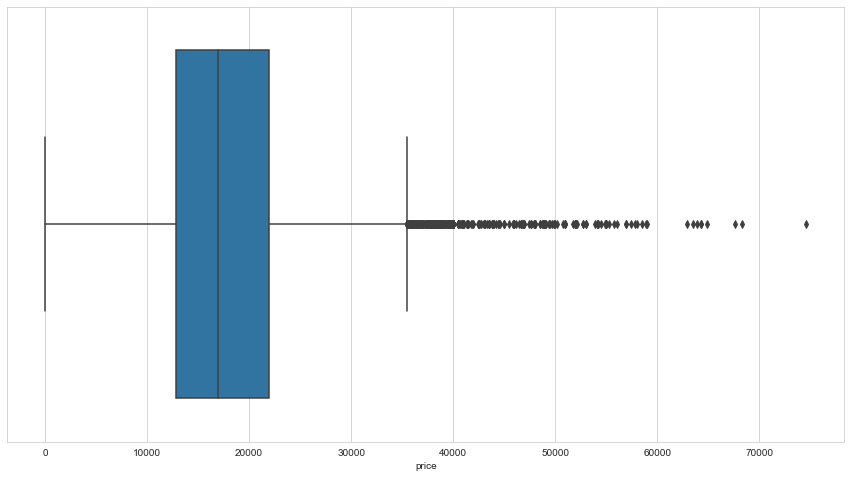

In [4]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = df['price']);

In [6]:
Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)

IQR = Q3 - Q1

In [7]:
Q1

12850.0

In [8]:
Q3

21900.0

In [9]:
IQR

9050.0

In [11]:
df.price.describe()

count   15919.000
mean    18019.897
std      7386.169
min        13.000
25%     12850.000
50%     16900.000
75%     21900.000
max     74600.000
Name: price, dtype: float64

In [13]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

In [14]:
lower_lim

-725.0

In [15]:
upper_lim

35475.0

In [16]:
not_outliers = (df.price >= lower_lim) & (df.price <= upper_lim)
not_outliers

0         True
1         True
2         True
3         True
4         True
         ...  
15914    False
15915    False
15916    False
15917    False
15918    False
Name: price, Length: 15919, dtype: bool

In [17]:
cleaned_df = df[not_outliers]
cleaned_df

make_model body_type  price               vat        km  \
0             Audi A1    Sedans  15770    VAT deductible 56013.000   
1             Audi A1    Sedans  14500  Price negotiable 80000.000   
2             Audi A1    Sedans  14640    VAT deductible 83450.000   
3             Audi A1    Sedans  14500    VAT deductible 73000.000   
4             Audi A1    Sedans  16790    VAT deductible 16200.000   
...               ...       ...    ...               ...       ...   
15791  Renault Espace       Van  33990    VAT deductible 10803.000   
15792  Renault Espace       Van  33975    VAT deductible    15.000   
15793  Renault Espace       Van  33990    VAT deductible     1.000   
15794  Renault Espace       Van  33975    VAT deductible    15.000   
15795  Renault Espace       Van  34200    VAT deductible     1.000   

                 Type Body Color Paint Type Gearing Type  Cylinders     Fuel  \
0                Used      Black   Metallic    Automatic      3.000   Diesel   
1                Used        Red   Metallic    Automatic      4.000  Benzine   
2                Used      Black   Metallic    Automatic      4.000   Diesel   
3                Used      Brown   Metallic    Automatic      3.000   Diesel   
4                Used      Black   Metallic    Automatic      3.000   Diesel   
...               ...        ...        ...          ...        ...      ...   
15791            Used       Grey   Metallic    Automatic      4.000   Diesel   
15792  Pre-registered      White   Metallic    Automatic      4.000  Benzine   
15793  Pre-registered       Grey   Metallic    Automatic      4.000   Diesel   
15794  Pre-registered      White   Metallic    Automatic      4.000   Diesel   
15795  Employee's car      White   Metallic    Automatic      4.000   Diesel   

                                   Comfort & Convenience  \
0      Air conditioning,Armrest,Automatic climate con...   
1      Air conditioning,Automatic climate control,Hil...   
2      Air conditioning,Cruise control,Electrical sid...   
3      Air suspension,Armrest,Auxiliary heating,Elect...   
4      Air conditioning,Armrest,Automatic climate con...   
...                                                  ...   
15791  Air conditioning,Armrest,Automatic climate con...   
15792  Air conditioning,Armrest,Automatic climate con...   
15793  Air conditioning,Automatic climate control,Cru...   
15794  Air conditioning,Automatic climate control,Cru...   
15795  Air conditioning,Automatic climate control,Cru...   

                                   Entertainment & Media  \
0      Bluetooth,Hands-free equipment,On-board comput...   
1      Bluetooth,Hands-free equipment,On-board comput...   
2                                  MP3,On-board computer   
3      Bluetooth,CD player,Hands-free equipment,MP3,O...   
4      Bluetooth,CD player,Hands-free equipment,MP3,O...   
...                                                  ...   
15791  Bluetooth,Digital radio,Hands-free equipment,M...   
15792  Bluetooth,Hands-free equipment,On-board comput...   
15793                  Bluetooth,Digital radio,Radio,USB   
15794  Bluetooth,Hands-free equipment,On-board comput...   
15795                                          Radio,USB   

                                                  Extras  \
0         Alloy wheels,Catalytic Converter,Voice Control   
1      Alloy wheels,Sport seats,Sport suspension,Voic...   
2                             Alloy wheels,Voice Control   
3                 Alloy wheels,Sport seats,Voice Control   
4      Alloy wheels,Sport package,Sport suspension,Vo...   
...                                                  ...   
15791                          Alloy wheels,Touch screen   
15792                                       Alloy wheels   
15793                          Alloy wheels,Touch screen   
15794                                       Alloy wheels   
15795                                       Alloy wheels   

                                       Safety 

In [18]:
 df.loc[(df.price < lower_lim) | (df.price > upper_lim)].index

Int64Index([  713,   732,  3587,  3589,  3590,  3591,  3592,  3593,  3594,
             3595,
            ...
            15909, 15910, 15911, 15912, 15913, 15914, 15915, 15916, 15917,
            15918],
           dtype='int64', length=479)

In [19]:
outlier_index = df.loc[(df.price < lower_lim) | (df.price > upper_lim)].index
outlier_index

Int64Index([  713,   732,  3587,  3589,  3590,  3591,  3592,  3593,  3594,
             3595,
            ...
            15909, 15910, 15911, 15912, 15913, 15914, 15915, 15916, 15917,
            15918],
           dtype='int64', length=479)

In [22]:
df.drop(outlier_index, inplace=True)

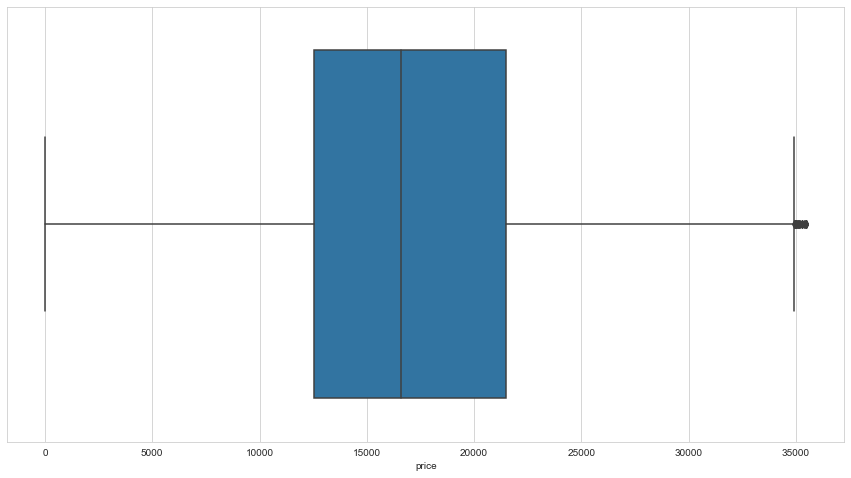

In [23]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = df['price']);

# km

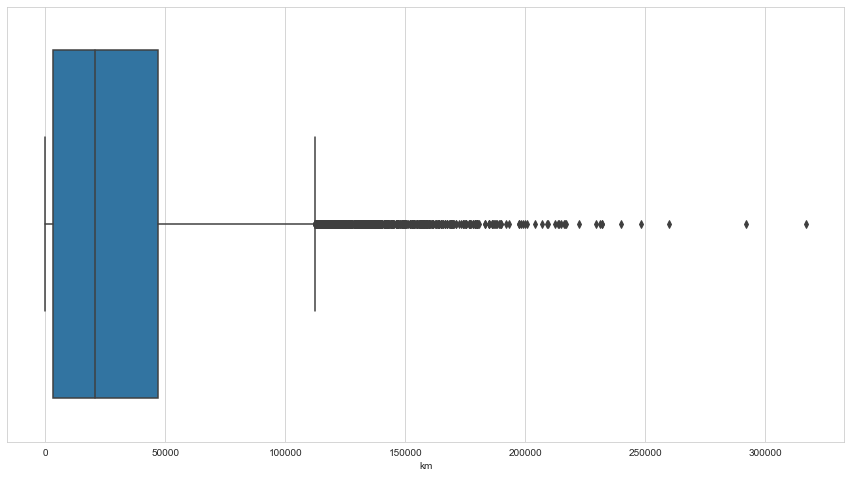

In [27]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = df['km']);

In [28]:
Q1 = df["km"].quantile(0.25)
Q3 = df["km"].quantile(0.75)

IQR = Q3 - Q1

In [29]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

In [36]:
not_outliers = (df.km >= lower_lim) & (df.km <= upper_lim)
not_outliers

0        True
1        True
2        True
3        True
4        True
         ... 
15914    True
15915    True
15916    True
15917    True
15918    True
Name: km, Length: 15919, dtype: bool

In [31]:
cleaned_df = df[not_outliers]
cleaned_df

make_model body_type  price               vat        km  \
0             Audi A1    Sedans  15770    VAT deductible 56013.000   
1             Audi A1    Sedans  14500  Price negotiable 80000.000   
2             Audi A1    Sedans  14640    VAT deductible 83450.000   
3             Audi A1    Sedans  14500    VAT deductible 73000.000   
4             Audi A1    Sedans  16790    VAT deductible 16200.000   
...               ...       ...    ...               ...       ...   
15914  Renault Espace       Van  39950    VAT deductible  1000.000   
15915  Renault Espace       Van  39885    VAT deductible  9900.000   
15916  Renault Espace       Van  39875    VAT deductible    15.000   
15917  Renault Espace       Van  39700    VAT deductible    10.000   
15918  Renault Espace       Van  40999    VAT deductible    10.000   

                 Type Body Color Paint Type Gearing Type  Cylinders     Fuel  \
0                Used      Black   Metallic    Automatic      3.000   Diesel   
1                Used        Red   Metallic    Automatic      4.000  Benzine   
2                Used      Black   Metallic    Automatic      4.000   Diesel   
3                Used      Brown   Metallic    Automatic      3.000   Diesel   
4                Used      Black   Metallic    Automatic      3.000   Diesel   
...               ...        ...        ...          ...        ...      ...   
15914             New       Grey   Metallic    Automatic      4.000   Diesel   
15915            Used       Grey   Metallic    Automatic      4.000  Benzine   
15916  Pre-registered      White   Metallic    Automatic      4.000   Diesel   
15917  Pre-registered       Grey   Metallic    Automatic      4.000   Diesel   
15918   Demonstration       Grey   Metallic    Automatic      4.000  Benzine   

                                   Comfort & Convenience  \
0      Air conditioning,Armrest,Automatic climate con...   
1      Air conditioning,Automatic climate control,Hil...   
2      Air conditioning,Cruise control,Electrical sid...   
3      Air suspension,Armrest,Auxiliary heating,Elect...   
4      Air conditioning,Armrest,Automatic climate con...   
...                                                  ...   
15914  Air conditioning,Automatic climate control,Cru...   
15915  Air conditioning,Automatic climate control,Cru...   
15916  Air conditioning,Armrest,Automatic climate con...   
15917  Air conditioning,Automatic climate control,Cru...   
15918  Air conditioning,Automatic climate control,Cru...   

                                   Entertainment & Media  \
0      Bluetooth,Hands-free equipment,On-board comput...   
1      Bluetooth,Hands-free equipment,On-board comput...   
2                                  MP3,On-board computer   
3      Bluetooth,CD player,Hands-free equipment,MP3,O...   
4      Bluetooth,CD player,Hands-free equipment,MP3,O...   
...                                                  ...   
15914  Bluetooth,Digital radio,Hands-free equipment,O...   
15915  Bluetooth,Digital radio,Hands-free equipment,R...   
15916  Bluetooth,Hands-free equipment,On-board comput...   
15917                  Bluetooth,Digital radio,Radio,USB   
15918                                                USB   

                                                  Extras  \
0         Alloy wheels,Catalytic Converter,Voice Control   
1      Alloy wheels,Sport seats,Sport suspension,Voic...   
2                             Alloy wheels,Voice Control   
3                 Alloy wheels,Sport seats,Voice Control   
4      Alloy wheels,Sport package,Sport suspension,Vo...   
...                                                  ...   
15914                          Alloy wheels,Touch screen   
15915            Alloy wheels,Touch screen,Voice Control   
15916                                       Alloy wheels   
15917                          Alloy wheels,Touch screen   
15918                          Alloy wheels,Touch screen   

                                       Safety 

In [37]:
df.loc[(df.km < lower_lim) | (df.km > upper_lim)].index

Int64Index([   25,    34,    61,    63,    64,   328,   369,   397,   443,
              465,
            ...
            15283, 15284, 15314, 15316, 15320, 15386, 15412, 15413, 15416,
            15420],
           dtype='int64', length=725)

In [38]:
outlier_index = df.loc[(df.km < lower_lim) | (df.km > upper_lim)].index
outlier_index

Int64Index([   25,    34,    61,    63,    64,   328,   369,   397,   443,
              465,
            ...
            15283, 15284, 15314, 15316, 15320, 15386, 15412, 15413, 15416,
            15420],
           dtype='int64', length=725)

In [39]:
df.drop(outlier_index, inplace=True)

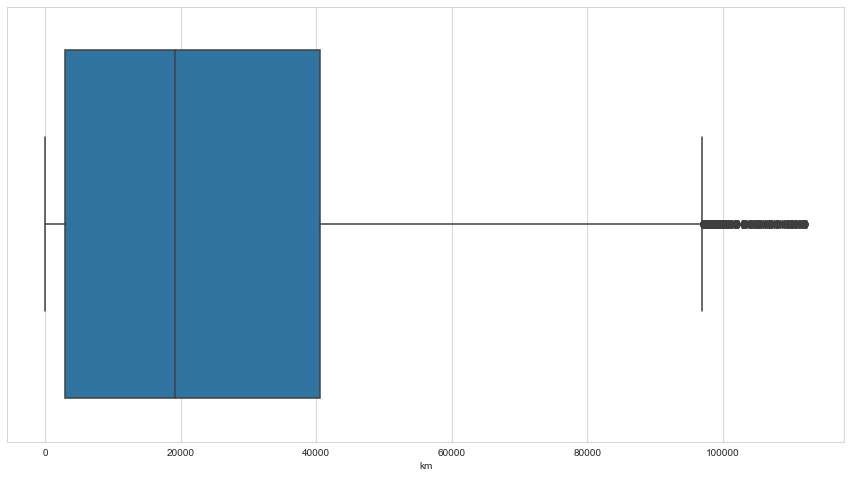

In [40]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = df['km']);

In [41]:
df.T

0      \
make_model                                                       Audi A1   
body_type                                                         Sedans   
price                                                              15770   
vat                                                       VAT deductible   
km                                                             56013.000   
Type                                                                Used   
Body Color                                                         Black   
Paint Type                                                      Metallic   
Gearing Type                                                   Automatic   
Cylinders                                                          3.000   
Fuel                                                              Diesel   
Comfort & Convenience  Air conditioning,Armrest,Automatic climate con...   
Entertainment & Media  Bluetooth,Hands-free equipment,On-board comput...   
Extras                    Alloy wheels,Catalytic Converter,Voice Control   
Safety & Security      ABS,Central door lock,Daytime running lights,D...   
Gears                                                              7.000   
Previous_Owners                                                    2.000   
hp_kW                                                             66.000   
Paint_Type                                                      Metallic   
Upholstery_type                                                    Cloth   
Upholstery_color                                                   Black   
Nr_of_Doors                                                        5.000   
Nr_of_Seats                                                        5.000   
Gearing_Type                                                   Automatic   
Displacement_cc                                                 1422.000   
Weight_kg                                                       1220.000   
Drive_chain                                                        front   
cons_comb                                                          3.800   
cons_city                                                          4.300   
cons_country                                                       3.500   
CO2_Emission                                                      99.000   
Emission_Class                                                    Euro 6   

                                                                   1      \
make_model                                                       Audi A1   
body_type                                                         Sedans   
price                                                              14500   
vat                                                     Price negotiable   
km                                                             80000.000   
Type                                                                Used   
Body Color                                                           Red   
Paint Type                                                      Metallic   
Gearing Type                                                   Automatic   
Cylinders                                                          4.000   
Fuel                                                             Benzine   
Comfort & Convenience  Air conditioning,Automatic climate control,Hil...   
Entertainment & Media  Bluetooth,Hands-free equipment,On-board comput...   
Extras                 Alloy wheels,Sport seats,Sport suspension,Voic...   
Safety & Security      ABS,Central door lock,Central door lock with r...   
Gears                                                              7.000   
Previous_Owners                                                    2.000   
hp_kW                                                            141.000   
Paint_Type                                                      Metallic   
Upholstery_type                       

# Cylinders

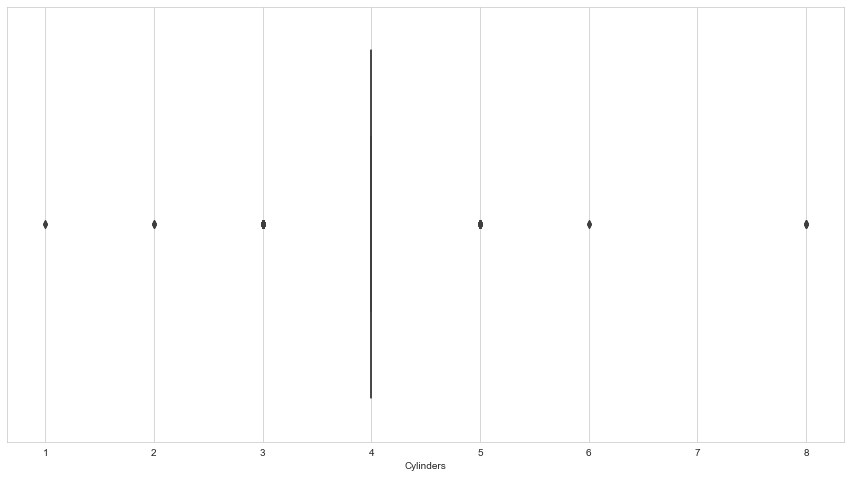

In [42]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = df['Cylinders']);

# Gears

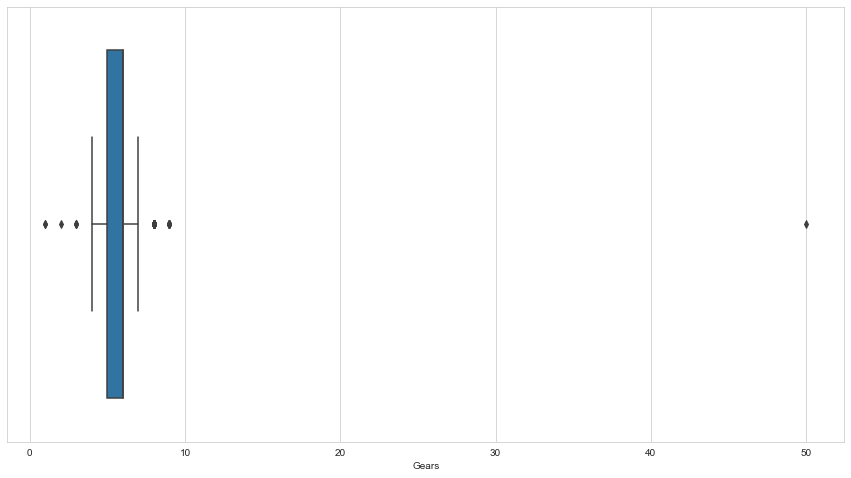

In [43]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = df['Gears']);

In [44]:
Q1 = df["Gears"].quantile(0.25)
Q3 = df["Gears"].quantile(0.75)

IQR = Q3 - Q1

In [47]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

In [48]:
not_outliers = (df.Gears >= lower_lim) & (df.Gears <= upper_lim)
not_outliers

0        True
1        True
2        True
3        True
4        True
         ... 
15914    True
15915    True
15916    True
15917    True
15918    True
Name: Gears, Length: 15194, dtype: bool

In [50]:
cleaned_df = df[not_outliers]
cleaned_df

make_model body_type  price               vat        km  \
0             Audi A1    Sedans  15770    VAT deductible 56013.000   
1             Audi A1    Sedans  14500  Price negotiable 80000.000   
2             Audi A1    Sedans  14640    VAT deductible 83450.000   
3             Audi A1    Sedans  14500    VAT deductible 73000.000   
4             Audi A1    Sedans  16790    VAT deductible 16200.000   
...               ...       ...    ...               ...       ...   
15914  Renault Espace       Van  39950    VAT deductible  1000.000   
15915  Renault Espace       Van  39885    VAT deductible  9900.000   
15916  Renault Espace       Van  39875    VAT deductible    15.000   
15917  Renault Espace       Van  39700    VAT deductible    10.000   
15918  Renault Espace       Van  40999    VAT deductible    10.000   

                 Type Body Color Paint Type Gearing Type  Cylinders     Fuel  \
0                Used      Black   Metallic    Automatic      3.000   Diesel   
1                Used        Red   Metallic    Automatic      4.000  Benzine   
2                Used      Black   Metallic    Automatic      4.000   Diesel   
3                Used      Brown   Metallic    Automatic      3.000   Diesel   
4                Used      Black   Metallic    Automatic      3.000   Diesel   
...               ...        ...        ...          ...        ...      ...   
15914             New       Grey   Metallic    Automatic      4.000   Diesel   
15915            Used       Grey   Metallic    Automatic      4.000  Benzine   
15916  Pre-registered      White   Metallic    Automatic      4.000   Diesel   
15917  Pre-registered       Grey   Metallic    Automatic      4.000   Diesel   
15918   Demonstration       Grey   Metallic    Automatic      4.000  Benzine   

                                   Comfort & Convenience  \
0      Air conditioning,Armrest,Automatic climate con...   
1      Air conditioning,Automatic climate control,Hil...   
2      Air conditioning,Cruise control,Electrical sid...   
3      Air suspension,Armrest,Auxiliary heating,Elect...   
4      Air conditioning,Armrest,Automatic climate con...   
...                                                  ...   
15914  Air conditioning,Automatic climate control,Cru...   
15915  Air conditioning,Automatic climate control,Cru...   
15916  Air conditioning,Armrest,Automatic climate con...   
15917  Air conditioning,Automatic climate control,Cru...   
15918  Air conditioning,Automatic climate control,Cru...   

                                   Entertainment & Media  \
0      Bluetooth,Hands-free equipment,On-board comput...   
1      Bluetooth,Hands-free equipment,On-board comput...   
2                                  MP3,On-board computer   
3      Bluetooth,CD player,Hands-free equipment,MP3,O...   
4      Bluetooth,CD player,Hands-free equipment,MP3,O...   
...                                                  ...   
15914  Bluetooth,Digital radio,Hands-free equipment,O...   
15915  Bluetooth,Digital radio,Hands-free equipment,R...   
15916  Bluetooth,Hands-free equipment,On-board comput...   
15917                  Bluetooth,Digital radio,Radio,USB   
15918                                                USB   

                                                  Extras  \
0         Alloy wheels,Catalytic Converter,Voice Control   
1      Alloy wheels,Sport seats,Sport suspension,Voic...   
2                             Alloy wheels,Voice Control   
3                 Alloy wheels,Sport seats,Voice Control   
4      Alloy wheels,Sport package,Sport suspension,Vo...   
...                                                  ...   
15914                          Alloy wheels,Touch screen   
15915            Alloy wheels,Touch screen,Voice Control   
15916                                       Alloy wheels   
15917                          Alloy wheels,Touch screen   
15918                          Alloy wheels,Touch screen   

                                       Safety 

In [51]:
df.loc[(df.Gears < lower_lim) | (df.Gears > upper_lim)].index

Int64Index([  215,  1033,  8921,  9812, 10151, 10483, 10550, 11242, 11250,
            11304,
            ...
            15824, 15827, 15828, 15829, 15830, 15845, 15846, 15869, 15876,
            15877],
           dtype='int64', length=304)

In [52]:
outlier_index = df.loc[(df.Gears < lower_lim) | (df.Gears > upper_lim)].index
outlier_index

Int64Index([  215,  1033,  8921,  9812, 10151, 10483, 10550, 11242, 11250,
            11304,
            ...
            15824, 15827, 15828, 15829, 15830, 15845, 15846, 15869, 15876,
            15877],
           dtype='int64', length=304)

In [53]:
df.drop(outlier_index, inplace=True)

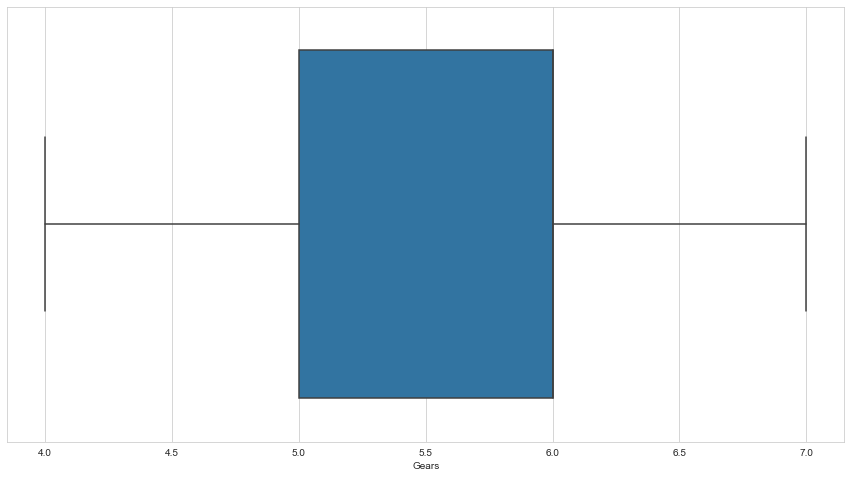

In [54]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = df['Gears']);

# Previous_Owners

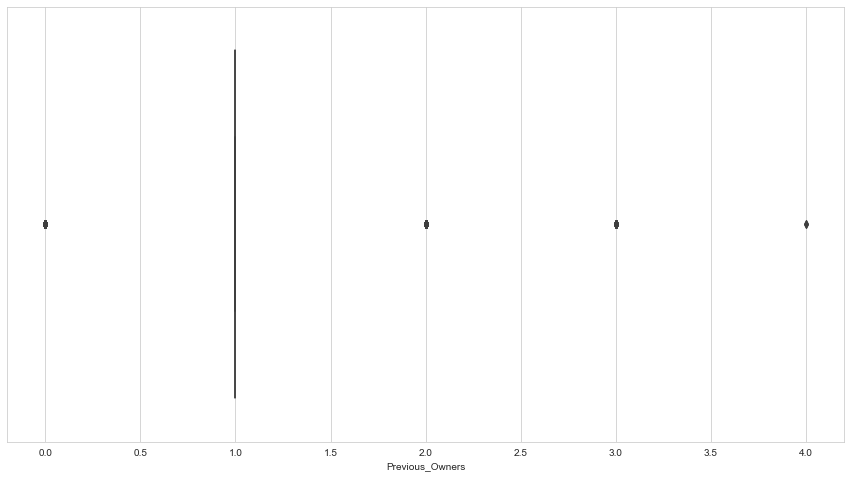

In [55]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = df['Previous_Owners']);

In [56]:
Q1 = df["Previous_Owners"].quantile(0.25)
Q3 = df["Previous_Owners"].quantile(0.75)

IQR = Q3 - Q1

In [57]:
IQR

0.0

In [58]:
Q3

1.0

In [59]:
Q1

1.0

In [60]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

In [64]:
lower_lim

1.0

In [65]:
upper_lim

1.0

In [66]:
not_outliers = (df.Previous_Owners >= lower_lim) & (df.Previous_Owners <= upper_lim)
not_outliers

0        False
1        False
2         True
3         True
4         True
         ...  
15914     True
15915     True
15916     True
15917     True
15918     True
Name: Previous_Owners, Length: 14890, dtype: bool

In [72]:
cleaned_df = df[not_outliers]
cleaned_df.T

2      \
make_model                                                       Audi A1   
body_type                                                         Sedans   
price                                                              14640   
vat                                                       VAT deductible   
km                                                             83450.000   
Type                                                                Used   
Body Color                                                         Black   
Paint Type                                                      Metallic   
Gearing Type                                                   Automatic   
Cylinders                                                          4.000   
Fuel                                                              Diesel   
Comfort & Convenience  Air conditioning,Cruise control,Electrical sid...   
Entertainment & Media                              MP3,On-board computer   
Extras                                        Alloy wheels,Voice Control   
Safety & Security      ABS,Central door lock,Daytime running lights,D...   
Gears                                                              7.000   
Previous_Owners                                                    1.000   
hp_kW                                                             85.000   
Paint_Type                                                      Metallic   
Upholstery_type                                                    Cloth   
Upholstery_color                                                   Black   
Nr_of_Doors                                                        4.000   
Nr_of_Seats                                                        4.000   
Gearing_Type                                                   Automatic   
Displacement_cc                                                 1598.000   
Weight_kg                                                       1255.000   
Drive_chain                                                        front   
cons_comb                                                          3.800   
cons_city                                                          4.400   
cons_country                                                       3.400   
CO2_Emission                                                      99.000   
Emission_Class                                                    Euro 6   

                                                                   3      \
make_model                                                       Audi A1   
body_type                                                         Sedans   
price                                                              14500   
vat                                                       VAT deductible   
km                                                             73000.000   
Type                                                                Used   
Body Color                                                         Brown   
Paint Type                                                      Metallic   
Gearing Type                                                   Automatic   
Cylinders                                                          3.000   
Fuel                                                              Diesel   
Comfort & Convenience  Air suspension,Armrest,Auxiliary heating,Elect...   
Entertainment & Media  Bluetooth,CD player,Hands-free equipment,MP3,O...   
Extras                            Alloy wheels,Sport seats,Voice Control   
Safety & Security      ABS,Alarm system,Central door lock with remote...   
Gears                                                              6.000   
Previous_Owners                                                    1.000   
hp_kW                                                             66.000   
Paint_Type                                                      Metallic   
Upholstery_type                       

In [68]:
df.loc[(df.Previous_Owners < lower_lim) | (df.Previous_Owners > upper_lim)].index

Int64Index([    0,     1,    38,    47,    48,    58,    59,    84,    85,
               86,
            ...
            15603, 15630, 15668, 15766, 15767, 15768, 15853, 15854, 15860,
            15861],
           dtype='int64', length=1670)

In [69]:
outlier_index = df.loc[(df.Previous_Owners < lower_lim) | (df.Previous_Owners > upper_lim)].index
outlier_index

Int64Index([    0,     1,    38,    47,    48,    58,    59,    84,    85,
               86,
            ...
            15603, 15630, 15668, 15766, 15767, 15768, 15853, 15854, 15860,
            15861],
           dtype='int64', length=1670)

In [70]:
df.drop(outlier_index, inplace=True)

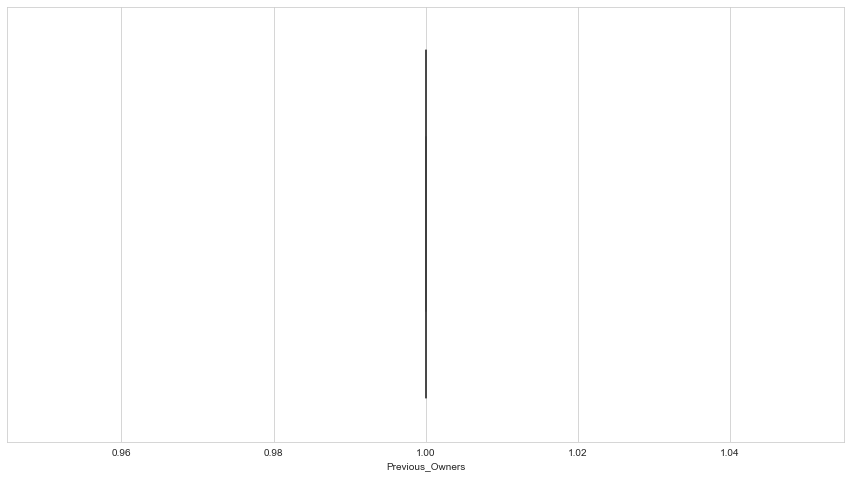

In [71]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = df['Previous_Owners']);

# hp_kW

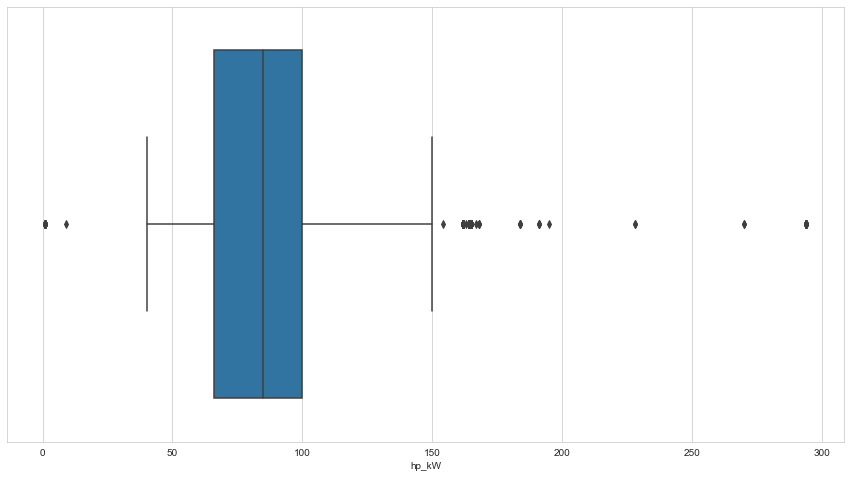

In [73]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = df['hp_kW']);

In [76]:
Q1 = df["hp_kW"].quantile(0.25)
Q3 = df["hp_kW"].quantile(0.75)

IQR = Q3 - Q1

In [77]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

In [78]:
not_outliers = (df.hp_kW >= lower_lim) & (df.hp_kW <= upper_lim)
not_outliers

2         True
3         True
4         True
5         True
6         True
         ...  
15914     True
15915    False
15916     True
15917     True
15918    False
Name: hp_kW, Length: 13220, dtype: bool

In [79]:
cleaned_df = df[not_outliers]
cleaned_df.T

2      \
make_model                                                       Audi A1   
body_type                                                         Sedans   
price                                                              14640   
vat                                                       VAT deductible   
km                                                             83450.000   
Type                                                                Used   
Body Color                                                         Black   
Paint Type                                                      Metallic   
Gearing Type                                                   Automatic   
Cylinders                                                          4.000   
Fuel                                                              Diesel   
Comfort & Convenience  Air conditioning,Cruise control,Electrical sid...   
Entertainment & Media                              MP3,On-board computer   
Extras                                        Alloy wheels,Voice Control   
Safety & Security      ABS,Central door lock,Daytime running lights,D...   
Gears                                                              7.000   
Previous_Owners                                                    1.000   
hp_kW                                                             85.000   
Paint_Type                                                      Metallic   
Upholstery_type                                                    Cloth   
Upholstery_color                                                   Black   
Nr_of_Doors                                                        4.000   
Nr_of_Seats                                                        4.000   
Gearing_Type                                                   Automatic   
Displacement_cc                                                 1598.000   
Weight_kg                                                       1255.000   
Drive_chain                                                        front   
cons_comb                                                          3.800   
cons_city                                                          4.400   
cons_country                                                       3.400   
CO2_Emission                                                      99.000   
Emission_Class                                                    Euro 6   

                                                                   3      \
make_model                                                       Audi A1   
body_type                                                         Sedans   
price                                                              14500   
vat                                                       VAT deductible   
km                                                             73000.000   
Type                                                                Used   
Body Color                                                         Brown   
Paint Type                                                      Metallic   
Gearing Type                                                   Automatic   
Cylinders                                                          3.000   
Fuel                                                              Diesel   
Comfort & Convenience  Air suspension,Armrest,Auxiliary heating,Elect...   
Entertainment & Media  Bluetooth,CD player,Hands-free equipment,MP3,O...   
Extras                            Alloy wheels,Sport seats,Voice Control   
Safety & Security      ABS,Alarm system,Central door lock with remote...   
Gears                                                              6.000   
Previous_Owners                                                    1.000   
hp_kW                                                             66.000   
Paint_Type                                                      Metallic   
Upholstery_type                       

In [80]:
df.loc[(df.hp_kW < lower_lim) | (df.hp_kW > upper_lim)].index

Int64Index([ 3353,  3587,  3590,  3592,  3593,  3594,  3595,  3596,  3597,
             3598,
            ...
            15900, 15903, 15905, 15906, 15907, 15908, 15910, 15913, 15915,
            15918],
           dtype='int64', length=359)

In [81]:
outlier_index = df.loc[(df.hp_kW < lower_lim) | (df.hp_kW > upper_lim)].index
outlier_index

Int64Index([ 3353,  3587,  3590,  3592,  3593,  3594,  3595,  3596,  3597,
             3598,
            ...
            15900, 15903, 15905, 15906, 15907, 15908, 15910, 15913, 15915,
            15918],
           dtype='int64', length=359)

In [82]:
df.drop(outlier_index, inplace=True)

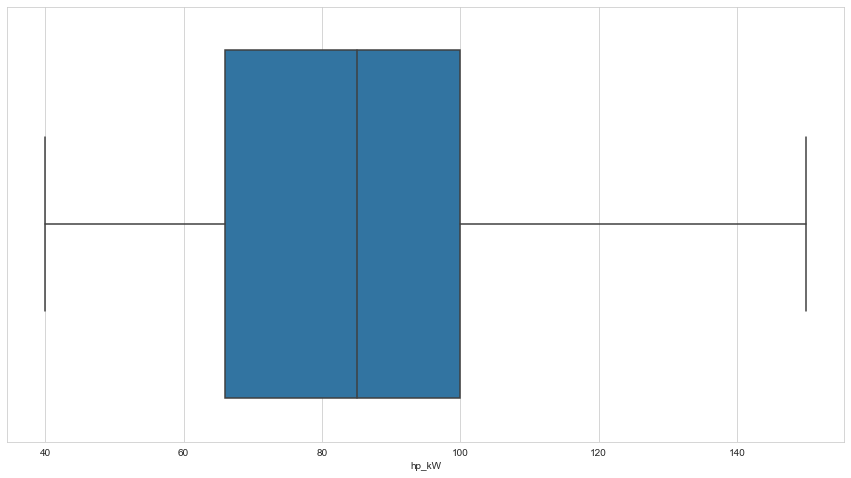

In [83]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = df['hp_kW']);

# Nr_of_Doors

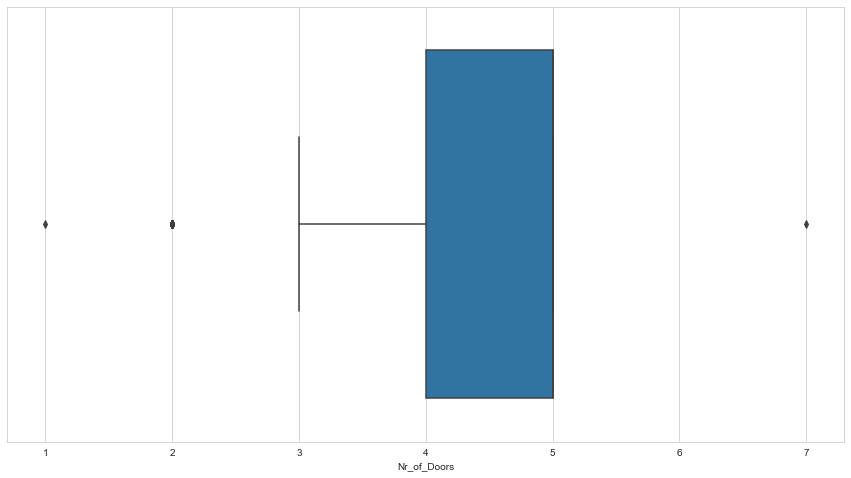

In [84]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = df['Nr_of_Doors']);

In [86]:
Q1 = df["Nr_of_Doors"].quantile(0.25)
Q3 = df["Nr_of_Doors"].quantile(0.75)

IQR = Q3 - Q1

In [87]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

In [88]:
not_outliers = (df.Nr_of_Doors >= lower_lim) & (df.Nr_of_Doors <= upper_lim)
not_outliers

2        True
3        True
4        True
5        True
6        True
         ... 
15911    True
15912    True
15914    True
15916    True
15917    True
Name: Nr_of_Doors, Length: 12861, dtype: bool

In [89]:
cleaned_df = df[not_outliers]
cleaned_df.T

2      \
make_model                                                       Audi A1   
body_type                                                         Sedans   
price                                                              14640   
vat                                                       VAT deductible   
km                                                             83450.000   
Type                                                                Used   
Body Color                                                         Black   
Paint Type                                                      Metallic   
Gearing Type                                                   Automatic   
Cylinders                                                          4.000   
Fuel                                                              Diesel   
Comfort & Convenience  Air conditioning,Cruise control,Electrical sid...   
Entertainment & Media                              MP3,On-board computer   
Extras                                        Alloy wheels,Voice Control   
Safety & Security      ABS,Central door lock,Daytime running lights,D...   
Gears                                                              7.000   
Previous_Owners                                                    1.000   
hp_kW                                                             85.000   
Paint_Type                                                      Metallic   
Upholstery_type                                                    Cloth   
Upholstery_color                                                   Black   
Nr_of_Doors                                                        4.000   
Nr_of_Seats                                                        4.000   
Gearing_Type                                                   Automatic   
Displacement_cc                                                 1598.000   
Weight_kg                                                       1255.000   
Drive_chain                                                        front   
cons_comb                                                          3.800   
cons_city                                                          4.400   
cons_country                                                       3.400   
CO2_Emission                                                      99.000   
Emission_Class                                                    Euro 6   

                                                                   3      \
make_model                                                       Audi A1   
body_type                                                         Sedans   
price                                                              14500   
vat                                                       VAT deductible   
km                                                             73000.000   
Type                                                                Used   
Body Color                                                         Brown   
Paint Type                                                      Metallic   
Gearing Type                                                   Automatic   
Cylinders                                                          3.000   
Fuel                                                              Diesel   
Comfort & Convenience  Air suspension,Armrest,Auxiliary heating,Elect...   
Entertainment & Media  Bluetooth,CD player,Hands-free equipment,MP3,O...   
Extras                            Alloy wheels,Sport seats,Voice Control   
Safety & Security      ABS,Alarm system,Central door lock with remote...   
Gears                                                              6.000   
Previous_Owners                                                    1.000   
hp_kW                                                             66.000   
Paint_Type                                                      Metallic   
Upholstery_type                       

In [90]:
df.loc[(df.Nr_of_Doors < lower_lim) | (df.Nr_of_Doors > upper_lim)].index

Int64Index([   26,    44,    55,    56,    93,   160,   221,   234,   273,
              281,
            ...
            10173, 10174, 10304, 10305, 10314, 10380, 10413, 10444, 13782,
            15202],
           dtype='int64', length=142)

In [91]:
outlier_index = df.loc[(df.Nr_of_Doors < lower_lim) | (df.Nr_of_Doors > upper_lim)].index
outlier_index

Int64Index([   26,    44,    55,    56,    93,   160,   221,   234,   273,
              281,
            ...
            10173, 10174, 10304, 10305, 10314, 10380, 10413, 10444, 13782,
            15202],
           dtype='int64', length=142)

In [92]:
df.drop(outlier_index, inplace=True)

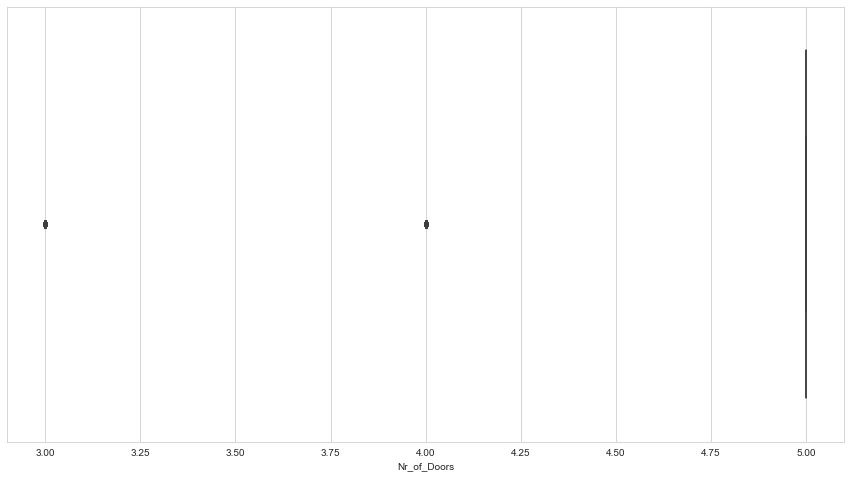

In [93]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = df['Nr_of_Doors']);

In [94]:
df.T

2      \
make_model                                                       Audi A1   
body_type                                                         Sedans   
price                                                              14640   
vat                                                       VAT deductible   
km                                                             83450.000   
Type                                                                Used   
Body Color                                                         Black   
Paint Type                                                      Metallic   
Gearing Type                                                   Automatic   
Cylinders                                                          4.000   
Fuel                                                              Diesel   
Comfort & Convenience  Air conditioning,Cruise control,Electrical sid...   
Entertainment & Media                              MP3,On-board computer   
Extras                                        Alloy wheels,Voice Control   
Safety & Security      ABS,Central door lock,Daytime running lights,D...   
Gears                                                              7.000   
Previous_Owners                                                    1.000   
hp_kW                                                             85.000   
Paint_Type                                                      Metallic   
Upholstery_type                                                    Cloth   
Upholstery_color                                                   Black   
Nr_of_Doors                                                        4.000   
Nr_of_Seats                                                        4.000   
Gearing_Type                                                   Automatic   
Displacement_cc                                                 1598.000   
Weight_kg                                                       1255.000   
Drive_chain                                                        front   
cons_comb                                                          3.800   
cons_city                                                          4.400   
cons_country                                                       3.400   
CO2_Emission                                                      99.000   
Emission_Class                                                    Euro 6   

                                                                   3      \
make_model                                                       Audi A1   
body_type                                                         Sedans   
price                                                              14500   
vat                                                       VAT deductible   
km                                                             73000.000   
Type                                                                Used   
Body Color                                                         Brown   
Paint Type                                                      Metallic   
Gearing Type                                                   Automatic   
Cylinders                                                          3.000   
Fuel                                                              Diesel   
Comfort & Convenience  Air suspension,Armrest,Auxiliary heating,Elect...   
Entertainment & Media  Bluetooth,CD player,Hands-free equipment,MP3,O...   
Extras                            Alloy wheels,Sport seats,Voice Control   
Safety & Security      ABS,Alarm system,Central door lock with remote...   
Gears                                                              6.000   
Previous_Owners                                                    1.000   
hp_kW                                                             66.000   
Paint_Type                                                      Metallic   
Upholstery_type                       

# Nr_of_Seats

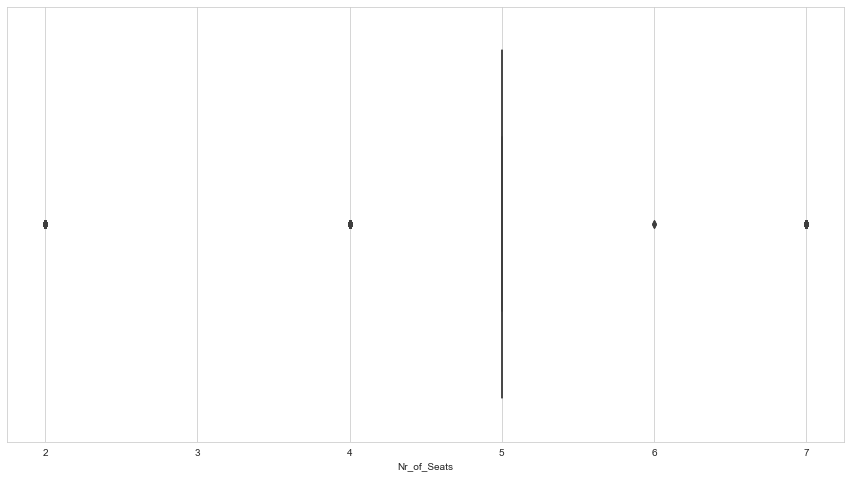

In [96]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = df['Nr_of_Seats']);

# Displacement_cc

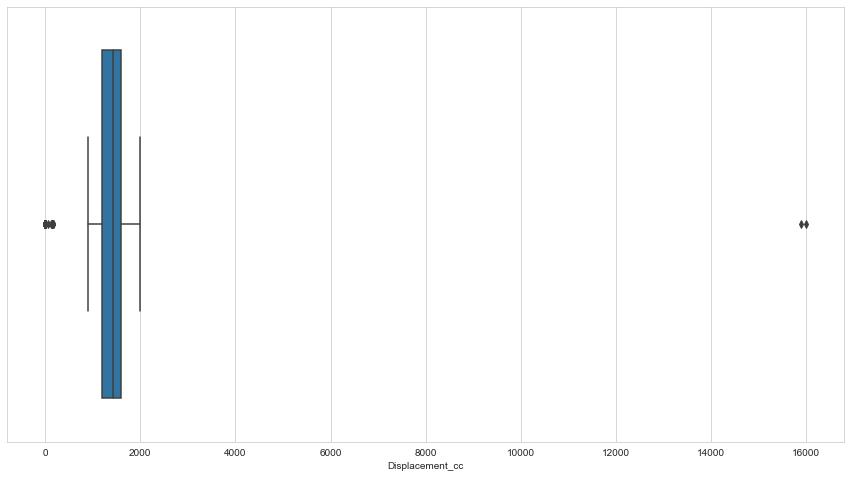

In [97]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = df['Displacement_cc']);

In [103]:
Q1 = df["Displacement_cc"].quantile(0.25)
Q3 = df["Displacement_cc"].quantile(0.75)

IQR = Q3 - Q1

In [104]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

In [105]:
not_outliers = (df.Displacement_cc >= lower_lim) & (df.Displacement_cc <= upper_lim)
not_outliers

2        True
3        True
4        True
5        True
6        True
         ... 
15911    True
15912    True
15914    True
15916    True
15917    True
Name: Displacement_cc, Length: 12719, dtype: bool

In [106]:
cleaned_df = df[not_outliers]
cleaned_df.T

2      \
make_model                                                       Audi A1   
body_type                                                         Sedans   
price                                                              14640   
vat                                                       VAT deductible   
km                                                             83450.000   
Type                                                                Used   
Body Color                                                         Black   
Paint Type                                                      Metallic   
Gearing Type                                                   Automatic   
Cylinders                                                          4.000   
Fuel                                                              Diesel   
Comfort & Convenience  Air conditioning,Cruise control,Electrical sid...   
Entertainment & Media                              MP3,On-board computer   
Extras                                        Alloy wheels,Voice Control   
Safety & Security      ABS,Central door lock,Daytime running lights,D...   
Gears                                                              7.000   
Previous_Owners                                                    1.000   
hp_kW                                                             85.000   
Paint_Type                                                      Metallic   
Upholstery_type                                                    Cloth   
Upholstery_color                                                   Black   
Nr_of_Doors                                                        4.000   
Nr_of_Seats                                                        4.000   
Gearing_Type                                                   Automatic   
Displacement_cc                                                 1598.000   
Weight_kg                                                       1255.000   
Drive_chain                                                        front   
cons_comb                                                          3.800   
cons_city                                                          4.400   
cons_country                                                       3.400   
CO2_Emission                                                      99.000   
Emission_Class                                                    Euro 6   

                                                                   3      \
make_model                                                       Audi A1   
body_type                                                         Sedans   
price                                                              14500   
vat                                                       VAT deductible   
km                                                             73000.000   
Type                                                                Used   
Body Color                                                         Brown   
Paint Type                                                      Metallic   
Gearing Type                                                   Automatic   
Cylinders                                                          3.000   
Fuel                                                              Diesel   
Comfort & Convenience  Air suspension,Armrest,Auxiliary heating,Elect...   
Entertainment & Media  Bluetooth,CD player,Hands-free equipment,MP3,O...   
Extras                            Alloy wheels,Sport seats,Voice Control   
Safety & Security      ABS,Alarm system,Central door lock with remote...   
Gears                                                              6.000   
Previous_Owners                                                    1.000   
hp_kW                                                             66.000   
Paint_Type                                                      Metallic   
Upholstery_type                       

In [107]:
df.loc[(df.Displacement_cc < lower_lim) | (df.Displacement_cc > upper_lim)].index

Int64Index([ 7169,  7809,  7810,  7811,  7812,  8128, 10194, 10559, 10932,
            12467, 12473, 12484, 12499, 12501, 12554, 12604, 12670, 12750,
            12769, 12781, 12783, 12786, 12790, 12796, 12798, 12800, 12815,
            12823, 12835, 12848, 12849, 13904, 13912, 14198, 14284, 14314,
            14315, 14319, 14320, 14321, 14322, 14324, 14325, 14326, 14327,
            14328, 15574, 15575, 15576, 15577, 15578, 15579],
           dtype='int64')

In [108]:
outlier_index = df.loc[(df.Displacement_cc < lower_lim) | (df.Displacement_cc > upper_lim)].index
outlier_index

Int64Index([ 7169,  7809,  7810,  7811,  7812,  8128, 10194, 10559, 10932,
            12467, 12473, 12484, 12499, 12501, 12554, 12604, 12670, 12750,
            12769, 12781, 12783, 12786, 12790, 12796, 12798, 12800, 12815,
            12823, 12835, 12848, 12849, 13904, 13912, 14198, 14284, 14314,
            14315, 14319, 14320, 14321, 14322, 14324, 14325, 14326, 14327,
            14328, 15574, 15575, 15576, 15577, 15578, 15579],
           dtype='int64')

In [109]:
df.drop(outlier_index, inplace=True)

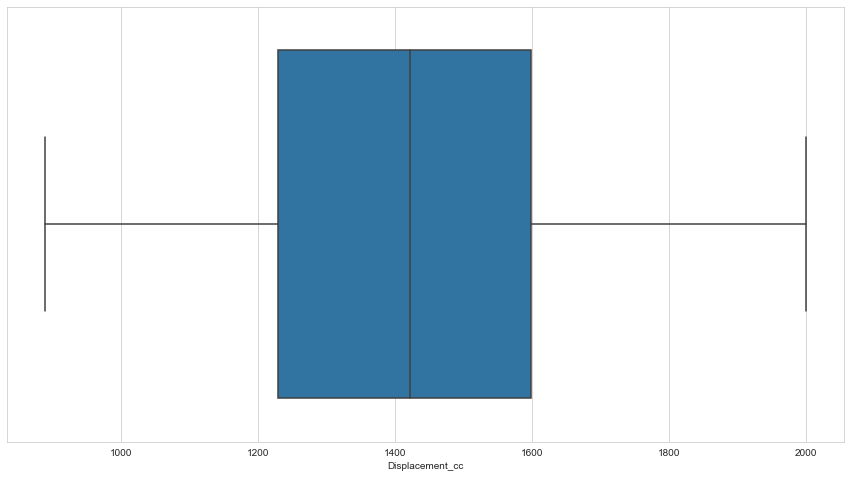

In [110]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = df['Displacement_cc']);

# Weight_kg

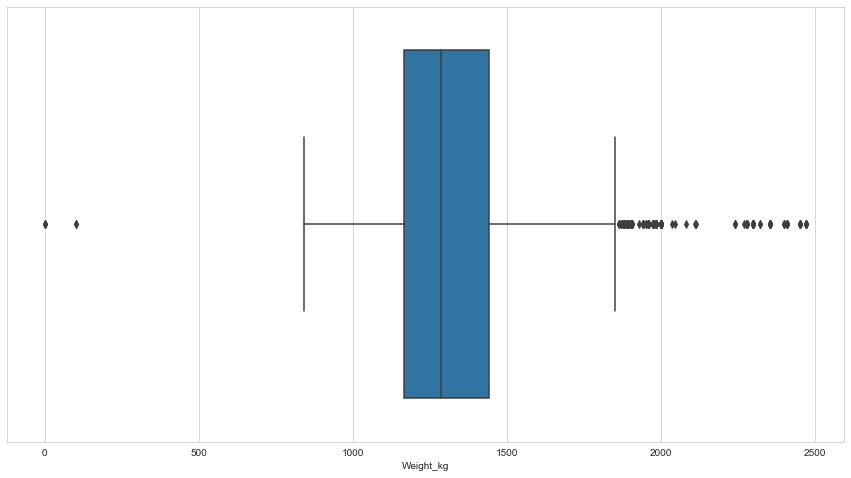

In [98]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = df['Weight_kg']);

In [111]:
Q1 = df["Weight_kg"].quantile(0.25)
Q3 = df["Weight_kg"].quantile(0.75)

IQR = Q3 - Q1

In [112]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

In [113]:
not_outliers = (df.Weight_kg >= lower_lim) & (df.Weight_kg <= upper_lim)
not_outliers

2        True
3        True
4        True
5        True
6        True
         ... 
15911    True
15912    True
15914    True
15916    True
15917    True
Name: Weight_kg, Length: 12667, dtype: bool

In [114]:
cleaned_df = df[not_outliers]
cleaned_df.T

2      \
make_model                                                       Audi A1   
body_type                                                         Sedans   
price                                                              14640   
vat                                                       VAT deductible   
km                                                             83450.000   
Type                                                                Used   
Body Color                                                         Black   
Paint Type                                                      Metallic   
Gearing Type                                                   Automatic   
Cylinders                                                          4.000   
Fuel                                                              Diesel   
Comfort & Convenience  Air conditioning,Cruise control,Electrical sid...   
Entertainment & Media                              MP3,On-board computer   
Extras                                        Alloy wheels,Voice Control   
Safety & Security      ABS,Central door lock,Daytime running lights,D...   
Gears                                                              7.000   
Previous_Owners                                                    1.000   
hp_kW                                                             85.000   
Paint_Type                                                      Metallic   
Upholstery_type                                                    Cloth   
Upholstery_color                                                   Black   
Nr_of_Doors                                                        4.000   
Nr_of_Seats                                                        4.000   
Gearing_Type                                                   Automatic   
Displacement_cc                                                 1598.000   
Weight_kg                                                       1255.000   
Drive_chain                                                        front   
cons_comb                                                          3.800   
cons_city                                                          4.400   
cons_country                                                       3.400   
CO2_Emission                                                      99.000   
Emission_Class                                                    Euro 6   

                                                                   3      \
make_model                                                       Audi A1   
body_type                                                         Sedans   
price                                                              14500   
vat                                                       VAT deductible   
km                                                             73000.000   
Type                                                                Used   
Body Color                                                         Brown   
Paint Type                                                      Metallic   
Gearing Type                                                   Automatic   
Cylinders                                                          3.000   
Fuel                                                              Diesel   
Comfort & Convenience  Air suspension,Armrest,Auxiliary heating,Elect...   
Entertainment & Media  Bluetooth,CD player,Hands-free equipment,MP3,O...   
Extras                            Alloy wheels,Sport seats,Voice Control   
Safety & Security      ABS,Alarm system,Central door lock with remote...   
Gears                                                              6.000   
Previous_Owners                                                    1.000   
hp_kW                                                             66.000   
Paint_Type                                                      Metallic   
Upholstery_type                       

In [115]:
df.loc[(df.Weight_kg < lower_lim) | (df.Weight_kg > upper_lim)].index

Int64Index([ 1143,  1144,  2662,  2708,  2709,  2710,  2711,  2712,  2714,
             2800,
            ...
            15280, 15294, 15299, 15330, 15607, 15678, 15754, 15836, 15847,
            15885],
           dtype='int64', length=221)

In [116]:
outlier_index = df.loc[(df.Weight_kg < lower_lim) | (df.Weight_kg > upper_lim)].index
outlier_index

Int64Index([ 1143,  1144,  2662,  2708,  2709,  2710,  2711,  2712,  2714,
             2800,
            ...
            15280, 15294, 15299, 15330, 15607, 15678, 15754, 15836, 15847,
            15885],
           dtype='int64', length=221)

In [117]:
df.drop(outlier_index, inplace=True)

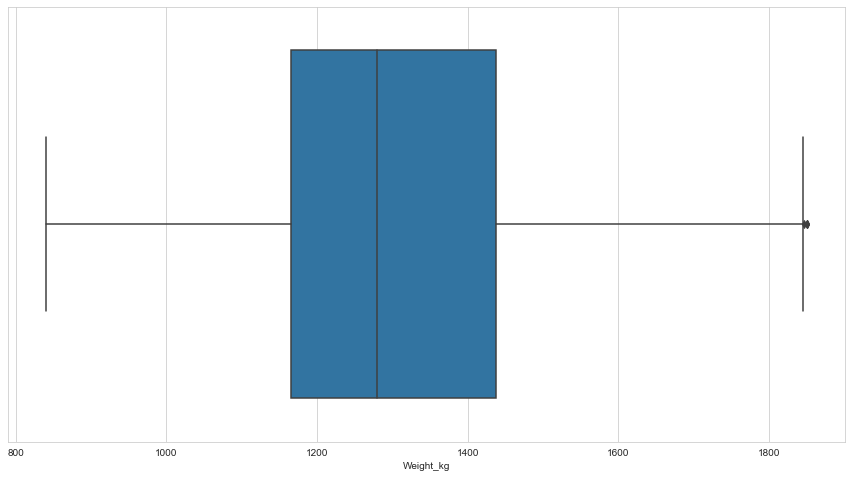

In [118]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = df['Weight_kg']);

# cons_comb

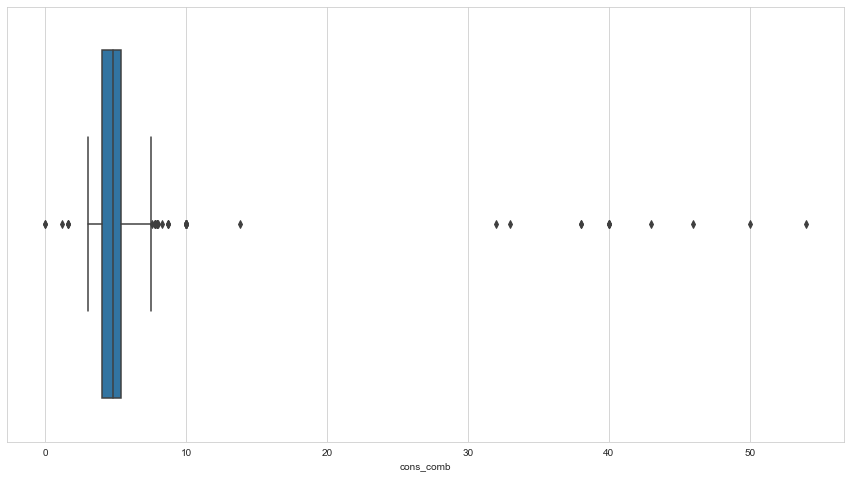

In [99]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = df['cons_comb']);

In [143]:
Q1 = df["cons_comb"].quantile(0.25)
Q3 = df["cons_comb"].quantile(0.75)

IQR = Q3 - Q1

In [144]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

In [145]:
not_outliers = (df.cons_comb >= lower_lim) & (df.cons_comb <= upper_lim)
not_outliers

2        True
3        True
4        True
5        True
6        True
         ... 
15911    True
15912    True
15914    True
15916    True
15917    True
Name: cons_comb, Length: 12189, dtype: bool

In [146]:
cleaned_df = df[not_outliers]
cleaned_df.T

2      \
make_model                                                       Audi A1   
body_type                                                         Sedans   
price                                                              14640   
vat                                                       VAT deductible   
km                                                             83450.000   
Type                                                                Used   
Body Color                                                         Black   
Paint Type                                                      Metallic   
Gearing Type                                                   Automatic   
Cylinders                                                          4.000   
Fuel                                                              Diesel   
Comfort & Convenience  Air conditioning,Cruise control,Electrical sid...   
Entertainment & Media                              MP3,On-board computer   
Extras                                        Alloy wheels,Voice Control   
Safety & Security      ABS,Central door lock,Daytime running lights,D...   
Gears                                                              7.000   
Previous_Owners                                                    1.000   
hp_kW                                                             85.000   
Paint_Type                                                      Metallic   
Upholstery_type                                                    Cloth   
Upholstery_color                                                   Black   
Nr_of_Doors                                                        4.000   
Nr_of_Seats                                                        4.000   
Gearing_Type                                                   Automatic   
Displacement_cc                                                 1598.000   
Weight_kg                                                       1255.000   
Drive_chain                                                        front   
cons_comb                                                          3.800   
cons_city                                                          4.400   
cons_country                                                       3.400   
CO2_Emission                                                      99.000   
Emission_Class                                                    Euro 6   

                                                                   3      \
make_model                                                       Audi A1   
body_type                                                         Sedans   
price                                                              14500   
vat                                                       VAT deductible   
km                                                             73000.000   
Type                                                                Used   
Body Color                                                         Brown   
Paint Type                                                      Metallic   
Gearing Type                                                   Automatic   
Cylinders                                                          3.000   
Fuel                                                              Diesel   
Comfort & Convenience  Air suspension,Armrest,Auxiliary heating,Elect...   
Entertainment & Media  Bluetooth,CD player,Hands-free equipment,MP3,O...   
Extras                            Alloy wheels,Sport seats,Voice Control   
Safety & Security      ABS,Alarm system,Central door lock with remote...   
Gears                                                              6.000   
Previous_Owners                                                    1.000   
hp_kW                                                             66.000   
Paint_Type                                                      Metallic   
Upholstery_type                       

In [147]:
df.loc[(df.cons_comb < lower_lim) | (df.cons_comb > upper_lim)].index

Int64Index([  500,  2801,  4100,  4101,  8268,  8269,  8270,  8319,  8321,
             8326, 10816, 12053, 12619, 12620, 13179, 13678, 13894, 14131,
            14530, 15067, 15833],
           dtype='int64')

In [148]:
outlier_index = df.loc[(df.cons_comb < lower_lim) | (df.cons_comb > upper_lim)].index
outlier_index

Int64Index([  500,  2801,  4100,  4101,  8268,  8269,  8270,  8319,  8321,
             8326, 10816, 12053, 12619, 12620, 13179, 13678, 13894, 14131,
            14530, 15067, 15833],
           dtype='int64')

In [149]:
df.drop(outlier_index, inplace=True)

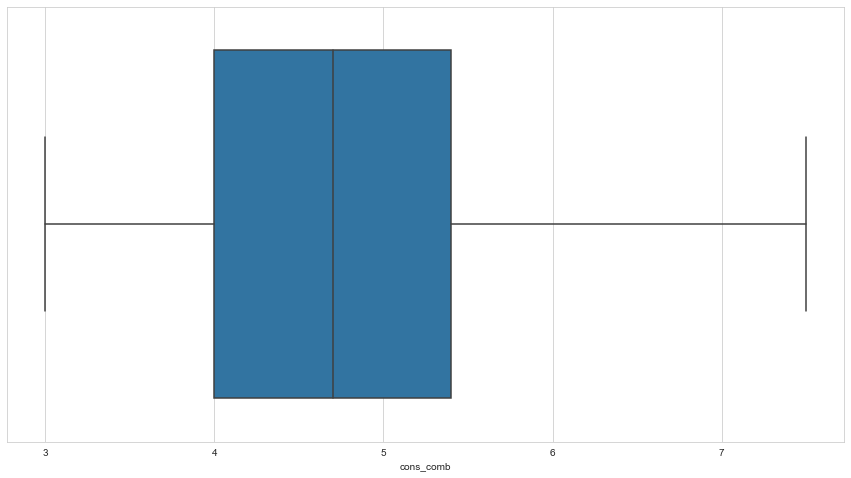

In [150]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = df['cons_comb']);

# cons_city

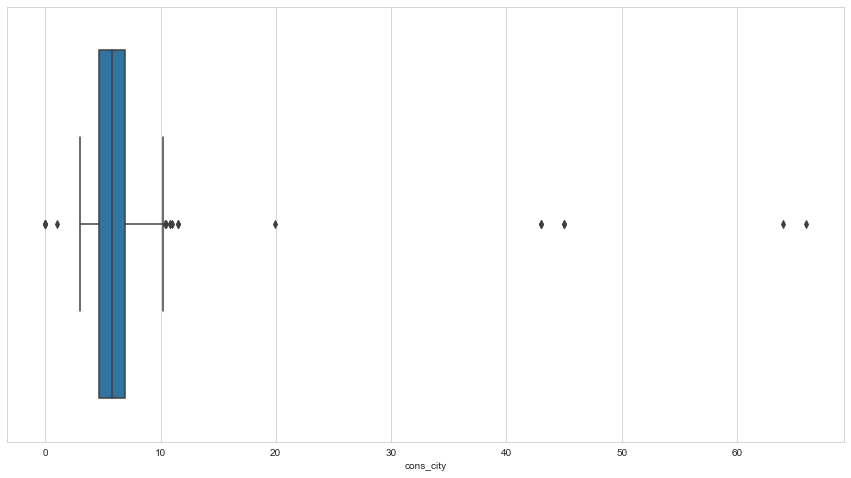

In [100]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = df['cons_city']);

In [135]:
Q1 = df["cons_city"].quantile(0.25)
Q3 = df["cons_city"].quantile(0.75)

IQR = Q3 - Q1

In [136]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR


In [137]:
not_outliers = (df.cons_city >= lower_lim) & (df.cons_city <= upper_lim)
not_outliers

2        True
3        True
4        True
5        True
6        True
         ... 
15911    True
15912    True
15914    True
15916    True
15917    True
Name: cons_city, Length: 12189, dtype: bool

In [138]:
cleaned_df = df[not_outliers]
cleaned_df.T

2      \
make_model                                                       Audi A1   
body_type                                                         Sedans   
price                                                              14640   
vat                                                       VAT deductible   
km                                                             83450.000   
Type                                                                Used   
Body Color                                                         Black   
Paint Type                                                      Metallic   
Gearing Type                                                   Automatic   
Cylinders                                                          4.000   
Fuel                                                              Diesel   
Comfort & Convenience  Air conditioning,Cruise control,Electrical sid...   
Entertainment & Media                              MP3,On-board computer   
Extras                                        Alloy wheels,Voice Control   
Safety & Security      ABS,Central door lock,Daytime running lights,D...   
Gears                                                              7.000   
Previous_Owners                                                    1.000   
hp_kW                                                             85.000   
Paint_Type                                                      Metallic   
Upholstery_type                                                    Cloth   
Upholstery_color                                                   Black   
Nr_of_Doors                                                        4.000   
Nr_of_Seats                                                        4.000   
Gearing_Type                                                   Automatic   
Displacement_cc                                                 1598.000   
Weight_kg                                                       1255.000   
Drive_chain                                                        front   
cons_comb                                                          3.800   
cons_city                                                          4.400   
cons_country                                                       3.400   
CO2_Emission                                                      99.000   
Emission_Class                                                    Euro 6   

                                                                   3      \
make_model                                                       Audi A1   
body_type                                                         Sedans   
price                                                              14500   
vat                                                       VAT deductible   
km                                                             73000.000   
Type                                                                Used   
Body Color                                                         Brown   
Paint Type                                                      Metallic   
Gearing Type                                                   Automatic   
Cylinders                                                          3.000   
Fuel                                                              Diesel   
Comfort & Convenience  Air suspension,Armrest,Auxiliary heating,Elect...   
Entertainment & Media  Bluetooth,CD player,Hands-free equipment,MP3,O...   
Extras                            Alloy wheels,Sport seats,Voice Control   
Safety & Security      ABS,Alarm system,Central door lock with remote...   
Gears                                                              6.000   
Previous_Owners                                                    1.000   
hp_kW                                                             66.000   
Paint_Type                                                      Metallic   
Upholstery_type                       

In [139]:
df.loc[(df.cons_city < lower_lim) | (df.cons_city > upper_lim)].index

Int64Index([], dtype='int64')

In [140]:
outlier_index = df.loc[(df.cons_city < lower_lim) | (df.cons_city > upper_lim)].index
outlier_index

Int64Index([], dtype='int64')

In [141]:
df.drop(outlier_index, inplace=True)

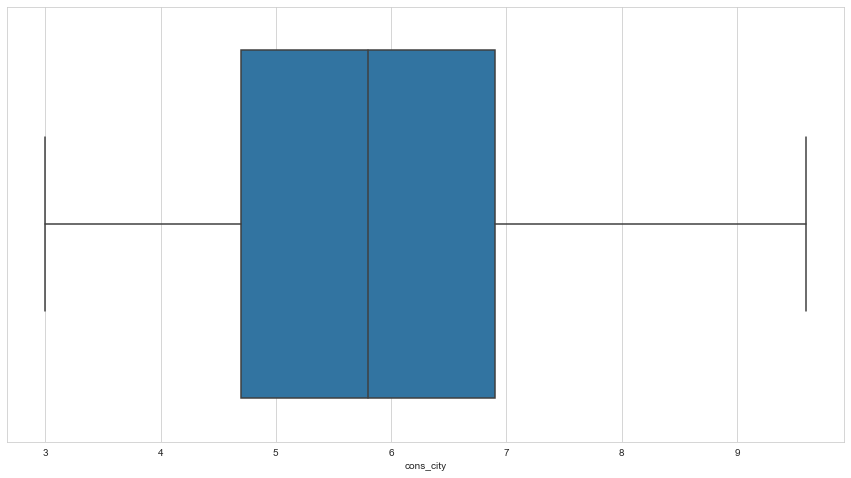

In [142]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = df['cons_city']);

# cons_country

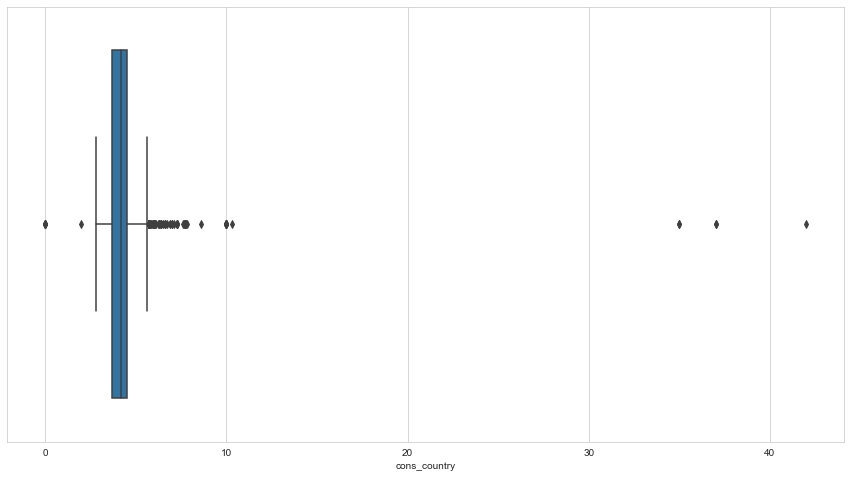

In [102]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = df['cons_country']);

In [127]:
Q1 = df["cons_country"].quantile(0.25)
Q3 = df["cons_country"].quantile(0.75)

IQR = Q3 - Q1

In [128]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

In [129]:
not_outliers = (df.cons_country >= lower_lim) & (df.cons_country <= upper_lim)
not_outliers

2        True
3        True
4        True
5        True
6        True
         ... 
15911    True
15912    True
15914    True
15916    True
15917    True
Name: cons_country, Length: 12343, dtype: bool

In [130]:
cleaned_df = df[not_outliers]
cleaned_df.T

2      \
make_model                                                       Audi A1   
body_type                                                         Sedans   
price                                                              14640   
vat                                                       VAT deductible   
km                                                             83450.000   
Type                                                                Used   
Body Color                                                         Black   
Paint Type                                                      Metallic   
Gearing Type                                                   Automatic   
Cylinders                                                          4.000   
Fuel                                                              Diesel   
Comfort & Convenience  Air conditioning,Cruise control,Electrical sid...   
Entertainment & Media                              MP3,On-board computer   
Extras                                        Alloy wheels,Voice Control   
Safety & Security      ABS,Central door lock,Daytime running lights,D...   
Gears                                                              7.000   
Previous_Owners                                                    1.000   
hp_kW                                                             85.000   
Paint_Type                                                      Metallic   
Upholstery_type                                                    Cloth   
Upholstery_color                                                   Black   
Nr_of_Doors                                                        4.000   
Nr_of_Seats                                                        4.000   
Gearing_Type                                                   Automatic   
Displacement_cc                                                 1598.000   
Weight_kg                                                       1255.000   
Drive_chain                                                        front   
cons_comb                                                          3.800   
cons_city                                                          4.400   
cons_country                                                       3.400   
CO2_Emission                                                      99.000   
Emission_Class                                                    Euro 6   

                                                                   3      \
make_model                                                       Audi A1   
body_type                                                         Sedans   
price                                                              14500   
vat                                                       VAT deductible   
km                                                             73000.000   
Type                                                                Used   
Body Color                                                         Brown   
Paint Type                                                      Metallic   
Gearing Type                                                   Automatic   
Cylinders                                                          3.000   
Fuel                                                              Diesel   
Comfort & Convenience  Air suspension,Armrest,Auxiliary heating,Elect...   
Entertainment & Media  Bluetooth,CD player,Hands-free equipment,MP3,O...   
Extras                            Alloy wheels,Sport seats,Voice Control   
Safety & Security      ABS,Alarm system,Central door lock with remote...   
Gears                                                              6.000   
Previous_Owners                                                    1.000   
hp_kW                                                             66.000   
Paint_Type                                                      Metallic   
Upholstery_type                       

In [131]:
df.loc[(df.cons_country < lower_lim) | (df.cons_country > upper_lim)].index

Int64Index([ 1644,  1839,  4102,  4558,  4894,  5161,  5693,  5814,  5902,
             6826,
            ...
            15599, 15604, 15605, 15625, 15720, 15721, 15731, 15826, 15848,
            15857],
           dtype='int64', length=154)

In [132]:
outlier_index = df.loc[(df.cons_country < lower_lim) | (df.cons_country > upper_lim)].index
outlier_index

Int64Index([ 1644,  1839,  4102,  4558,  4894,  5161,  5693,  5814,  5902,
             6826,
            ...
            15599, 15604, 15605, 15625, 15720, 15721, 15731, 15826, 15848,
            15857],
           dtype='int64', length=154)

In [133]:
df.drop(outlier_index, inplace=True)

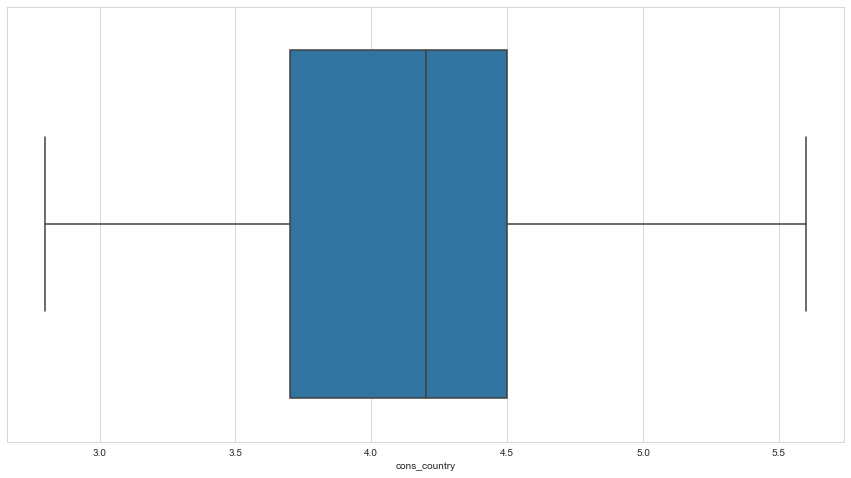

In [134]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = df['cons_country']);

# CO2_Emission	

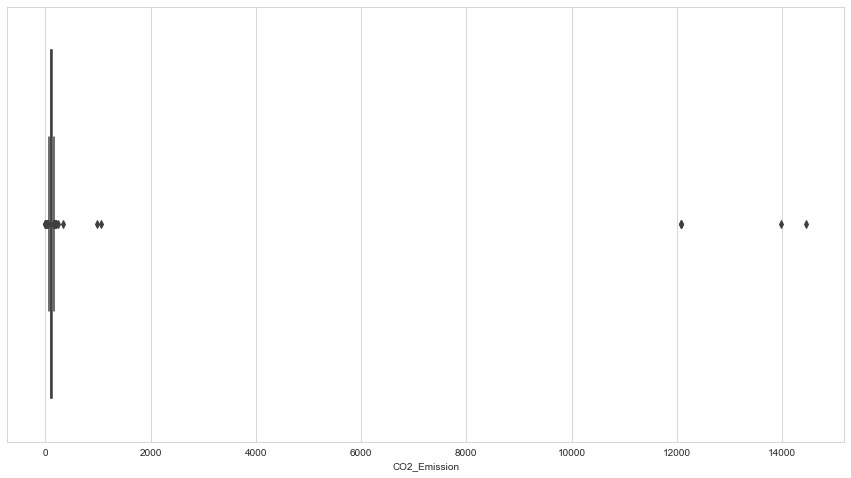

In [101]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = df['CO2_Emission']);

In [119]:
Q1 = df["CO2_Emission"].quantile(0.25)
Q3 = df["CO2_Emission"].quantile(0.75)

IQR = Q3 - Q1

In [120]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

In [121]:
not_outliers = (df.CO2_Emission >= lower_lim) & (df.CO2_Emission
                                                 
                                                 <= upper_lim)
not_outliers

2        True
3        True
4        True
5        True
6        True
         ... 
15911    True
15912    True
15914    True
15916    True
15917    True
Name: CO2_Emission, Length: 12446, dtype: bool

In [122]:
cleaned_df = df[not_outliers]
cleaned_df.T

2      \
make_model                                                       Audi A1   
body_type                                                         Sedans   
price                                                              14640   
vat                                                       VAT deductible   
km                                                             83450.000   
Type                                                                Used   
Body Color                                                         Black   
Paint Type                                                      Metallic   
Gearing Type                                                   Automatic   
Cylinders                                                          4.000   
Fuel                                                              Diesel   
Comfort & Convenience  Air conditioning,Cruise control,Electrical sid...   
Entertainment & Media                              MP3,On-board computer   
Extras                                        Alloy wheels,Voice Control   
Safety & Security      ABS,Central door lock,Daytime running lights,D...   
Gears                                                              7.000   
Previous_Owners                                                    1.000   
hp_kW                                                             85.000   
Paint_Type                                                      Metallic   
Upholstery_type                                                    Cloth   
Upholstery_color                                                   Black   
Nr_of_Doors                                                        4.000   
Nr_of_Seats                                                        4.000   
Gearing_Type                                                   Automatic   
Displacement_cc                                                 1598.000   
Weight_kg                                                       1255.000   
Drive_chain                                                        front   
cons_comb                                                          3.800   
cons_city                                                          4.400   
cons_country                                                       3.400   
CO2_Emission                                                      99.000   
Emission_Class                                                    Euro 6   

                                                                   3      \
make_model                                                       Audi A1   
body_type                                                         Sedans   
price                                                              14500   
vat                                                       VAT deductible   
km                                                             73000.000   
Type                                                                Used   
Body Color                                                         Brown   
Paint Type                                                      Metallic   
Gearing Type                                                   Automatic   
Cylinders                                                          3.000   
Fuel                                                              Diesel   
Comfort & Convenience  Air suspension,Armrest,Auxiliary heating,Elect...   
Entertainment & Media  Bluetooth,CD player,Hands-free equipment,MP3,O...   
Extras                            Alloy wheels,Sport seats,Voice Control   
Safety & Security      ABS,Alarm system,Central door lock with remote...   
Gears                                                              6.000   
Previous_Owners                                                    1.000   
hp_kW                                                             66.000   
Paint_Type                                                      Metallic   
Upholstery_type                       

In [123]:
df.loc[(df.CO2_Emission < lower_lim) | (df.CO2_Emission > upper_lim)].index

Int64Index([  535,  3591,  3607,  3611,  3612,  3613,  3615,  3616,  3617,
             4089,
            ...
            15805, 15821, 15842, 15852, 15863, 15875, 15878, 15883, 15890,
            15909],
           dtype='int64', length=103)

In [124]:
outlier_index = df.loc[(df.CO2_Emission < lower_lim) | (df.CO2_Emission > upper_lim)].index
outlier_index

Int64Index([  535,  3591,  3607,  3611,  3612,  3613,  3615,  3616,  3617,
             4089,
            ...
            15805, 15821, 15842, 15852, 15863, 15875, 15878, 15883, 15890,
            15909],
           dtype='int64', length=103)

In [125]:
df.drop(outlier_index, inplace=True)

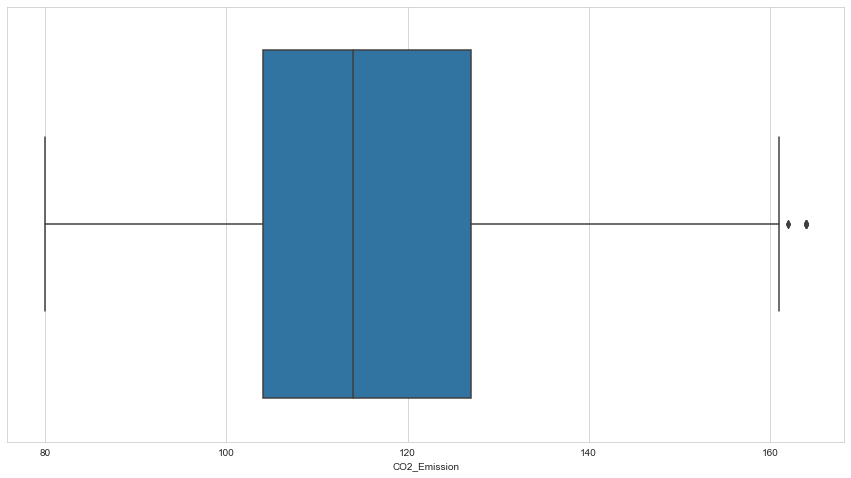

In [126]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = df['CO2_Emission']);

# Saving file in csv format with Handling With Missing Values

In [151]:
df.T

2      \
make_model                                                       Audi A1   
body_type                                                         Sedans   
price                                                              14640   
vat                                                       VAT deductible   
km                                                             83450.000   
Type                                                                Used   
Body Color                                                         Black   
Paint Type                                                      Metallic   
Gearing Type                                                   Automatic   
Cylinders                                                          4.000   
Fuel                                                              Diesel   
Comfort & Convenience  Air conditioning,Cruise control,Electrical sid...   
Entertainment & Media                              MP3,On-board computer   
Extras                                        Alloy wheels,Voice Control   
Safety & Security      ABS,Central door lock,Daytime running lights,D...   
Gears                                                              7.000   
Previous_Owners                                                    1.000   
hp_kW                                                             85.000   
Paint_Type                                                      Metallic   
Upholstery_type                                                    Cloth   
Upholstery_color                                                   Black   
Nr_of_Doors                                                        4.000   
Nr_of_Seats                                                        4.000   
Gearing_Type                                                   Automatic   
Displacement_cc                                                 1598.000   
Weight_kg                                                       1255.000   
Drive_chain                                                        front   
cons_comb                                                          3.800   
cons_city                                                          4.400   
cons_country                                                       3.400   
CO2_Emission                                                      99.000   
Emission_Class                                                    Euro 6   

                                                                   3      \
make_model                                                       Audi A1   
body_type                                                         Sedans   
price                                                              14500   
vat                                                       VAT deductible   
km                                                             73000.000   
Type                                                                Used   
Body Color                                                         Brown   
Paint Type                                                      Metallic   
Gearing Type                                                   Automatic   
Cylinders                                                          3.000   
Fuel                                                              Diesel   
Comfort & Convenience  Air suspension,Armrest,Auxiliary heating,Elect...   
Entertainment & Media  Bluetooth,CD player,Hands-free equipment,MP3,O...   
Extras                            Alloy wheels,Sport seats,Voice Control   
Safety & Security      ABS,Alarm system,Central door lock with remote...   
Gears                                                              6.000   
Previous_Owners                                                    1.000   
hp_kW                                                             66.000   
Paint_Type                                                      Metallic   
Upholstery_type                       

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12168 entries, 2 to 15917
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   make_model             12168 non-null  object 
 1   body_type              12168 non-null  object 
 2   price                  12168 non-null  int64  
 3   vat                    12168 non-null  object 
 4   km                     12168 non-null  float64
 5   Type                   12168 non-null  object 
 6   Body Color             12168 non-null  object 
 7   Paint Type             12168 non-null  object 
 8   Gearing Type           12168 non-null  object 
 9   Cylinders              12168 non-null  float64
 10  Fuel                   12168 non-null  object 
 11  Comfort & Convenience  12168 non-null  object 
 12  Entertainment & Media  12168 non-null  object 
 13  Extras                 12168 non-null  object 
 14  Safety & Security      12168 non-null  object 
 15  Ge

In [153]:
df.shape

(12168, 32)

In [154]:
df.to_csv("clean_scout_emrePART3.csv", index=False)